In [4]:
import numpy as np
from nilearn.maskers import NiftiLabelsMasker
from nilearn.datasets import fetch_neurovault_ids
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps


from neuromaps import transforms 
from surfplot import Plot

from neuromaps.transforms import mni152_to_fslr
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

from neuromaps.datasets import fetch_fslr
from nilearn.regions import signals_to_img_labels
from nilearn import regions
import surfplot as spl
from nilearn.input_data import NiftiMasker
from nilearn.plotting  import view_img


from nilearn.image import math_img

In [5]:
def create_surface_map_from_parcellated_signal(data, parcellation, zoom=None, shape='inflated'): 
    
    #mesh, gii_like data for surface visualisation
    fslr = fetch_fslr()
    lh, rh = fslr[shape] #'inflated' 'midthickness'
    p = spl.Plot(surf_lh=lh, surf_rh=rh)
    
    #transform data from parcellation to volumetric (niimg)
    data_nii = regions.signals_to_img_labels(data,parcellation)
    print(data_nii.shape)
    
 
    
    
    #transform data from volumetric to surface/vertices (giimg)
    gii_lh, gii_rh = transforms.mni152_to_fslr(data_nii, fslr_density='32k', method='linear')

    
    
    
    data_lh = gii_lh.agg_data()
    data_rh = gii_rh.agg_data()


    
    
    
    
    p = spl.Plot(surf_lh=lh, surf_rh=rh)
    p.add_layer({"left": data_lh, "right": data_rh}, cmap="cold_hot_r" )
    
   
  
    
    
    return p.build()

In [6]:
def create_surface_map_from_ROI_signal(data, mask, zoom=None, shape='inflated'): 
    
    zoom=None,
    shape='inflated'
    
    
    #mesh, gii_like data for surface visualisation
    fslr = fetch_fslr()
    lh, rh = fslr[shape] #'inflated' 'midthickness'
    p = spl.Plot(surf_lh=lh, surf_rh=rh)


    visual = math_img('img==4', img=mask)
    masker = NiftiMasker(mask_img=visual).fit()
    r_img = masker.inverse_transform([Ridge_correlations])
    data_nii=r_img[0]
    print(data_nii.shape)
    
       
    
    
    #transform data from volumetric to surface/vertices (giimg)
    gii_lh, gii_rh = transforms.mni152_to_fslr(data_nii, fslr_density='32k', method='linear')
  
    
    
    
    data_lh = gii_lh.agg_data()
    data_rh = gii_rh.agg_data()



    

    
    
    p = spl.Plot(surf_lh=lh, surf_rh=rh)
    p.add_layer({"left": data_lh, "right": data_rh}, cmap="cold_hot_r")
    

    
    
    
    return p.build()

In [7]:
def create_surface_map_from_Full_signal(data, mask, zoom=None, shape='inflated'): 
    
    zoom=None,
    shape='inflated'
    
    
    #mesh, gii_like data for surface visualisation
    fslr = fetch_fslr()
    lh, rh = fslr[shape] #'inflated' 'midthickness'
    p = spl.Plot(surf_lh=lh, surf_rh=rh)
    

    
    masker = NiftiMasker(mask_img=mask).fit()
    Ridge_correlations = data
    r_img = masker.inverse_transform([Ridge_correlations])
       
    
    data_nii=r_img[0]
    print(data_nii.shape)
    
    
    #transform data from volumetric to surface/vertices (giimg)
    gii_lh, gii_rh = transforms.mni152_to_fslr(data_nii, fslr_density='32k', method='linear')

    
    
    
    data_lh = gii_lh.agg_data()
    data_rh = gii_rh.agg_data()



    
    
    p = spl.Plot(surf_lh=lh, surf_rh=rh)
    p.add_layer({"left": data_lh, "right": data_rh}, cmap="cold_hot_r")
    
    

    
    
    
    return p.build()

# subject1

(444,)
(1, 444)
(53, 64, 52, 1)


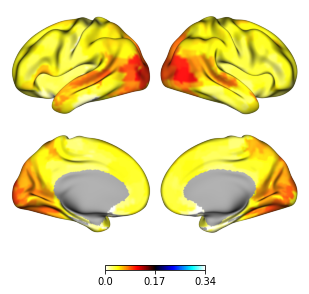

In [8]:
masker='Data_last/MIST_444.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub1_Par_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)
Ridge_correlations=Ridge_correlations.reshape((1,444))
print(Ridge_correlations.shape)    

ff=create_surface_map_from_parcellated_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(6728,)
(53, 64, 52)


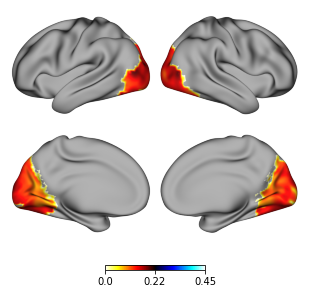

In [9]:
masker='Data_last/template_cambridge_basc_multiscale_sym_scale007.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub1_ROI_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)

ff=create_surface_map_from_ROI_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(264805,)
(97, 115, 97)


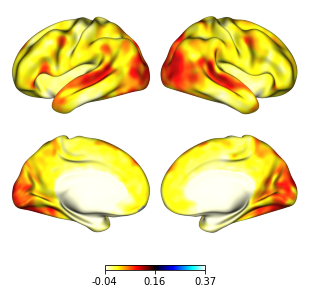

In [10]:
A1=np.load('Data_last/Full_Sub1/A1_sub1_correlations_voxel.npy', allow_pickle=True)
A2=np.load('Data_last/Full_Sub1/A2_Sub1_correlations_voxel.npy', allow_pickle=True)
A3=np.load('Data_last/Full_Sub1/A3_Sub1_correlations_voxel.npy', allow_pickle=True)
A4=np.load('Data_last/Full_Sub1/A4_Sub1_correlations_voxel.npy', allow_pickle=True)
A5=np.load('Data_last/Full_Sub1/A5_Sub1_correlations_voxel.npy', allow_pickle=True)
A6=np.load('Data_last/Full_Sub1/A6_correlations_voxel.npy', allow_pickle=True)
A7=np.load('Data_last/Full_Sub1/A7_correlations_voxel.npy', allow_pickle=True)
A8=np.load('Data_last/Full_Sub1/A8_correlations_voxel.npy', allow_pickle=True)
A9=np.load('Data_last/Full_Sub1/A9_correlations_voxel.npy', allow_pickle=True)
A10=np.load('Data_last/Full_Sub1/A10_correlations_voxel.npy', allow_pickle=True)
A11=np.load('Data_last/Full_Sub1/A11_correlations_voxel.npy', allow_pickle=True)
A12=np.load('Data_last/Full_Sub1/A12_correlations_voxel.npy', allow_pickle=True)
A13=np.load('Data_last/Full_Sub1/A13_correlations_voxel.npy', allow_pickle=True)
A14=np.load('Data_last/Full_Sub1/A14_correlations_voxel.npy', allow_pickle=True)
A15=np.load('Data_last/Full_Sub1/A15_correlations_voxel.npy', allow_pickle=True)
A16=np.load('Data_last/Full_Sub1/A16_correlations_voxel.npy', allow_pickle=True)
A17=np.load('Data_last/Full_Sub1/A17_correlations_voxel.npy', allow_pickle=True)
A18=np.load('Data_last/Full_Sub1/A18_correlations_voxel.npy', allow_pickle=True)
A19=np.load('Data_last/Full_Sub1/A19_correlations_voxel.npy', allow_pickle=True)
A20=np.load('Data_last/Full_Sub1/A20_correlations_voxel.npy', allow_pickle=True)
A21=np.load('Data_last/Full_Sub1/A21_correlations_voxel.npy', allow_pickle=True)
A_T1=np.concatenate((A1, A2, A3 , A4 , A5, A6, A7, A8 , A9 , A10,A11, A12, A13 , A14 , A15, A16, A17, A18 , A19 , A20 , A21))
print(A_T1.shape)

masker='Data_last/Full_Sub1/sub-01_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

Ridge_correlations = A_T1
    

ff=create_surface_map_from_Full_signal(Ridge_correlations, masker, zoom=None, shape='inflated') 

# Subject2 

(444,)
(1, 444)
(53, 64, 52, 1)


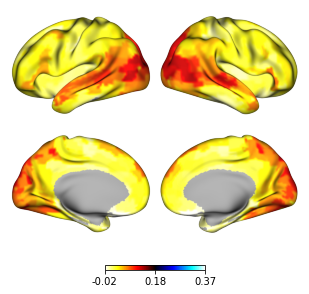

In [11]:
masker='Data_last/MIST_444.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub2_Par_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)
Ridge_correlations=Ridge_correlations.reshape((1,444))
print(Ridge_correlations.shape)    

ff=create_surface_map_from_parcellated_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(6728,)
(53, 64, 52)


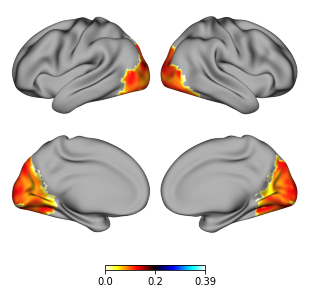

In [12]:
masker='Data_last/template_cambridge_basc_multiscale_sym_scale007.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub2_ROI_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)

ff=create_surface_map_from_ROI_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(266126,)
(97, 115, 97)


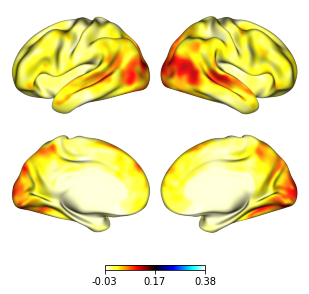

In [13]:
A1=np.load('Data_last/Full_Sub2/A1_sub2_correlations_voxel.npy', allow_pickle=True)
A2=np.load('Data_last/Full_Sub2/A2_Sub2_correlations_voxel.npy', allow_pickle=True)
A3=np.load('Data_last/Full_Sub2/A3_Sub2_correlations_voxel.npy', allow_pickle=True)
A4=np.load('Data_last/Full_Sub2/A4_Sub2_correlations_voxel.npy', allow_pickle=True)
A5=np.load('Data_last/Full_Sub2/A5_Sub2_correlations_voxel.npy', allow_pickle=True)
A6=np.load('Data_last/Full_Sub2/A6_correlations_voxel.npy', allow_pickle=True)
A7=np.load('Data_last/Full_Sub2/A7_correlations_voxel.npy', allow_pickle=True)
A8=np.load('Data_last/Full_Sub2/A8_correlations_voxel.npy', allow_pickle=True)
A9=np.load('Data_last/Full_Sub2/A9_correlations_voxel.npy', allow_pickle=True)
A10=np.load('Data_last/Full_Sub2/A10_correlations_voxel.npy', allow_pickle=True)
A11=np.load('Data_last/Full_Sub2/A11_correlations_voxel.npy', allow_pickle=True)
A12=np.load('Data_last/Full_Sub2/A12_correlations_voxel.npy', allow_pickle=True)
A13=np.load('Data_last/Full_Sub2/A13_correlations_voxel.npy', allow_pickle=True)
A14=np.load('Data_last/Full_Sub2/A14_correlations_voxel.npy', allow_pickle=True)
A15=np.load('Data_last/Full_Sub2/A15_correlations_voxel.npy', allow_pickle=True)
A16=np.load('Data_last/Full_Sub2/A16_correlations_voxel.npy', allow_pickle=True)
A17=np.load('Data_last/Full_Sub2/A17_correlations_voxel.npy', allow_pickle=True)
A18=np.load('Data_last/Full_Sub2/A18_correlations_voxel.npy', allow_pickle=True)
A19=np.load('Data_last/Full_Sub2/A19_correlations_voxel.npy', allow_pickle=True)
A20=np.load('Data_last/Full_Sub2/A20_correlations_voxel.npy', allow_pickle=True)
A21=np.load('Data_last/Full_Sub2/A21_correlations_voxel.npy', allow_pickle=True)
A_T1=np.concatenate((A1, A2, A3 , A4 , A5, A6, A7, A8 , A9 , A10,A11, A12, A13 , A14 , A15, A16, A17, A18 , A19 , A20 , A21))
print(A_T1.shape)

masker='Data_last/Full_Sub2/sub-02_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

Ridge_correlations = A_T1
    

ff=create_surface_map_from_Full_signal(Ridge_correlations, masker, zoom=None, shape='inflated') 

# Subject3

(444,)
(1, 444)
(53, 64, 52, 1)


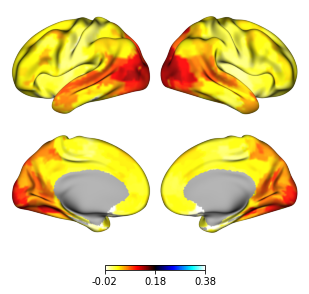

In [14]:
masker='Data_last/MIST_444.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub3_Par_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)
Ridge_correlations=Ridge_correlations.reshape((1,444))
print(Ridge_correlations.shape)    

ff=create_surface_map_from_parcellated_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(6728,)
(53, 64, 52)


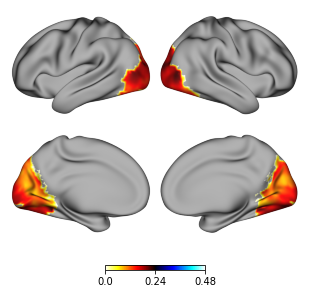

In [15]:
masker='Data_last/template_cambridge_basc_multiscale_sym_scale007.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub3_ROI_correlations_2.npy', allow_pickle=True)
print(Ridge_correlations.shape)

ff=create_surface_map_from_ROI_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

In [16]:
Ridge_correlations = np.load('Data_last/3Sea_Sub3_ROI_correlations_2.npy', allow_pickle=True)
np.max(Ridge_correlations)

0.5129422785037808

(261880,)
(97, 115, 97)


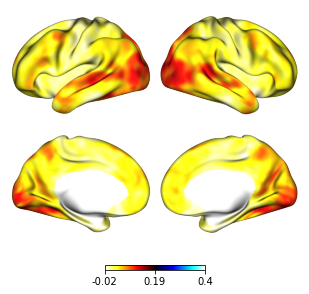

In [17]:
A1=np.load('Data_last/Full_Sub3/A1_sub3_correlations_voxel.npy', allow_pickle=True)
A2=np.load('Data_last/Full_Sub3/A2_correlations_voxel.npy', allow_pickle=True)
A3=np.load('Data_last/Full_Sub3/A3_correlations_voxel.npy', allow_pickle=True)
A4=np.load('Data_last/Full_Sub3/A4_correlations_voxel.npy', allow_pickle=True)
A5=np.load('Data_last/Full_Sub3/A5_correlations_voxel.npy', allow_pickle=True)
A6=np.load('Data_last/Full_Sub3/A6_correlations_voxel.npy', allow_pickle=True)
A7=np.load('Data_last/Full_Sub3/A7_correlations_voxel.npy', allow_pickle=True)
A8=np.load('Data_last/Full_Sub3/A8_correlations_voxel.npy', allow_pickle=True)
A9=np.load('Data_last/Full_Sub3/A9_correlations_voxel.npy', allow_pickle=True)
A10=np.load('Data_last/Full_Sub3/A10_correlations_voxel.npy', allow_pickle=True)
A11=np.load('Data_last/Full_Sub3/A11_correlations_voxel.npy', allow_pickle=True)
A12=np.load('Data_last/Full_Sub3/A12_correlations_voxel.npy', allow_pickle=True)
A13=np.load('Data_last/Full_Sub3/A13_correlations_voxel.npy', allow_pickle=True)
A14=np.load('Data_last/Full_Sub3/A14_correlations_voxel.npy', allow_pickle=True)
A15=np.load('Data_last/Full_Sub3/A15_correlations_voxel.npy', allow_pickle=True)
A16=np.load('Data_last/Full_Sub3/A16_correlations_voxel.npy', allow_pickle=True)
A17=np.load('Data_last/Full_Sub3/A17_correlations_voxel.npy', allow_pickle=True)
A18=np.load('Data_last/Full_Sub3/A18_correlations_voxel.npy', allow_pickle=True)
A19=np.load('Data_last/Full_Sub3/A19_correlations_voxel.npy', allow_pickle=True)
A20=np.load('Data_last/Full_Sub3/A20_correlations_voxel.npy', allow_pickle=True)
A21=np.load('Data_last/Full_Sub3/A21_correlations_voxel.npy', allow_pickle=True)
A_T1=np.concatenate((A1, A2, A3 , A4 , A5, A6, A7, A8 , A9 , A10,A11, A12, A13 , A14 , A15, A16, A17, A18 , A19 , A20 , A21))
print(A_T1.shape)

masker='Data_last/Full_Sub3/sub-03_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

Ridge_correlations = A_T1
    

ff=create_surface_map_from_Full_signal(Ridge_correlations, masker, zoom=None, shape='inflated') 

# Subject4

(444,)
(1, 444)
(53, 64, 52, 1)


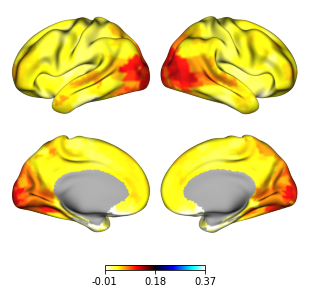

In [18]:
masker='Data_last/MIST_444.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub4_Par_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)
Ridge_correlations=Ridge_correlations.reshape((1,444))
print(Ridge_correlations.shape)    

ff=create_surface_map_from_parcellated_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(6728,)
(53, 64, 52)


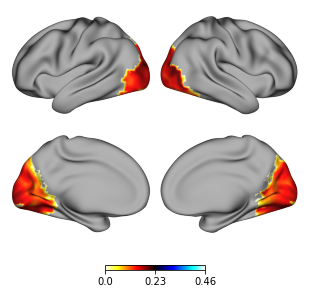

In [19]:
masker='Data_last/template_cambridge_basc_multiscale_sym_scale007.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub4_ROI_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)

ff=create_surface_map_from_ROI_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(266391,)
(97, 115, 97)


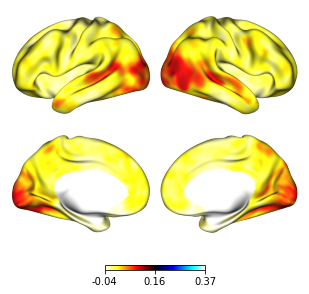

In [20]:
A1=np.load('Data_last/Full_Sub4/A1_correlations_voxel.npy', allow_pickle=True)
A2=np.load('Data_last/Full_Sub4/A2_correlations_voxel.npy', allow_pickle=True)
A3=np.load('Data_last/Full_Sub4/A3_correlations_voxel.npy', allow_pickle=True)
A4=np.load('Data_last/Full_Sub4/A4_correlations_voxel.npy', allow_pickle=True)
A5=np.load('Data_last/Full_Sub4/A5_correlations_voxel.npy', allow_pickle=True)
A6=np.load('Data_last/Full_Sub4/A6_correlations_voxel.npy', allow_pickle=True)
A7=np.load('Data_last/Full_Sub4/A7_correlations_voxel.npy', allow_pickle=True)
A8=np.load('Data_last/Full_Sub4/A8_correlations_voxel.npy', allow_pickle=True)
A9=np.load('Data_last/Full_Sub4/A9_correlations_voxel.npy', allow_pickle=True)
A10=np.load('Data_last/Full_Sub4/A10_correlations_voxel.npy', allow_pickle=True)
A11=np.load('Data_last/Full_Sub4/A11_correlations_voxel.npy', allow_pickle=True)
A12=np.load('Data_last/Full_Sub4/A12_correlations_voxel.npy', allow_pickle=True)
A13=np.load('Data_last/Full_Sub4/A13_correlations_voxel.npy', allow_pickle=True)
A14=np.load('Data_last/Full_Sub4/A14_correlations_voxel.npy', allow_pickle=True)
A15=np.load('Data_last/Full_Sub4/A15_correlations_voxel.npy', allow_pickle=True)
A16=np.load('Data_last/Full_Sub4/A16_correlations_voxel.npy', allow_pickle=True)
A17=np.load('Data_last/Full_Sub4/A17_correlations_voxel.npy', allow_pickle=True)
A18=np.load('Data_last/Full_Sub4/A18_correlations_voxel.npy', allow_pickle=True)
A19=np.load('Data_last/Full_Sub4/A19_correlations_voxel.npy', allow_pickle=True)
A20=np.load('Data_last/Full_Sub4/A20_correlations_voxel.npy', allow_pickle=True)
A21=np.load('Data_last/Full_Sub4/A21_correlations_voxel.npy', allow_pickle=True)
A_T1=np.concatenate((A1, A2, A3 , A4 , A5, A6, A7, A8 , A9 , A10,A11, A12, A13 , A14 , A15, A16, A17, A18 , A19 , A20 , A21))
print(A_T1.shape)

masker='Data_last/Full_Sub4/sub-04_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

Ridge_correlations = A_T1
    

ff=create_surface_map_from_Full_signal(Ridge_correlations, masker, zoom=None, shape='inflated') 

# Subject5

(444,)
(1, 444)
(53, 64, 52, 1)


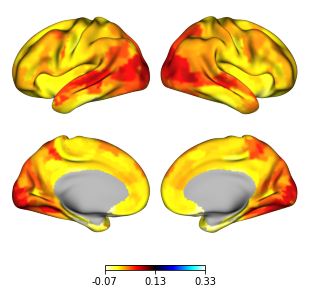

In [21]:
masker='Data_last/MIST_444.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub5_Par_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)
Ridge_correlations=Ridge_correlations.reshape((1,444))
print(Ridge_correlations.shape)    

ff=create_surface_map_from_parcellated_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(6728,)
(53, 64, 52)


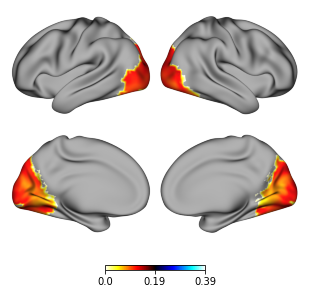

In [22]:
masker='Data_last/template_cambridge_basc_multiscale_sym_scale007.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub5_ROI_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)

ff=create_surface_map_from_ROI_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(263574,)
(97, 115, 97)


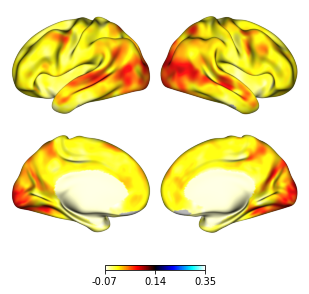

In [23]:
A1=np.load('Data_last/Full_Sub5/A1_correlations_voxel.npy', allow_pickle=True)
A2=np.load('Data_last/Full_Sub5/A2_correlations_voxel.npy', allow_pickle=True)
A3=np.load('Data_last/Full_Sub5/A3_correlations_voxel.npy', allow_pickle=True)
A4=np.load('Data_last/Full_Sub5/A4_correlations_voxel.npy', allow_pickle=True)
A5=np.load('Data_last/Full_Sub5/A5_correlations_voxel.npy', allow_pickle=True)
A6=np.load('Data_last/Full_Sub5/A6_correlations_voxel.npy', allow_pickle=True)
A7=np.load('Data_last/Full_Sub5/A7_correlations_voxel.npy', allow_pickle=True)
A8=np.load('Data_last/Full_Sub5/A8_correlations_voxel.npy', allow_pickle=True)
A9=np.load('Data_last/Full_Sub5/A9_correlations_voxel.npy', allow_pickle=True)
A10=np.load('Data_last/Full_Sub5/A10_correlations_voxel.npy', allow_pickle=True)
A11=np.load('Data_last/Full_Sub5/A11_correlations_voxel.npy', allow_pickle=True)
A12=np.load('Data_last/Full_Sub5/A12_correlations_voxel.npy', allow_pickle=True)
A13=np.load('Data_last/Full_Sub5/A13_correlations_voxel.npy', allow_pickle=True)
A14=np.load('Data_last/Full_Sub5/A14_correlations_voxel.npy', allow_pickle=True)
A15=np.load('Data_last/Full_Sub5/A15_correlations_voxel.npy', allow_pickle=True)
A16=np.load('Data_last/Full_Sub5/A16_correlations_voxel.npy', allow_pickle=True)
A17=np.load('Data_last/Full_Sub5/A17_correlations_voxel.npy', allow_pickle=True)
A18=np.load('Data_last/Full_Sub5/A18_correlations_voxel.npy', allow_pickle=True)
A19=np.load('Data_last/Full_Sub5/A19_correlations_voxel.npy', allow_pickle=True)
A20=np.load('Data_last/Full_Sub5/A20_correlations_voxel.npy', allow_pickle=True)
A21=np.load('Data_last/Full_Sub5/A21_correlations_voxel.npy', allow_pickle=True)
A_T1=np.concatenate((A1, A2, A3 , A4 , A5, A6, A7, A8 , A9 , A10,A11, A12, A13 , A14 , A15, A16, A17, A18 , A19 , A20 , A21))
print(A_T1.shape)

masker='Data_last/Full_Sub5/sub-05_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

Ridge_correlations = A_T1
    

ff=create_surface_map_from_Full_signal(Ridge_correlations, masker, zoom=None, shape='inflated') 

# Subject6

(444,)
(1, 444)
(53, 64, 52, 1)


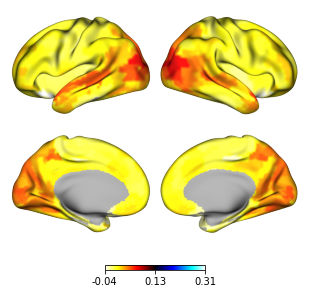

In [24]:
masker='Data_last/MIST_444.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub6_Par_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)
Ridge_correlations=Ridge_correlations.reshape((1,444))
print(Ridge_correlations.shape)    

ff=create_surface_map_from_parcellated_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(6728,)
(53, 64, 52)


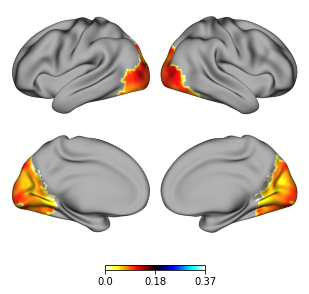

In [25]:
masker='Data_last/template_cambridge_basc_multiscale_sym_scale007.nii.gz'

Ridge_correlations = np.load('Data_last/3Sea_Sub6_ROI_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)

ff=create_surface_map_from_ROI_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(281532,)
(97, 115, 97)


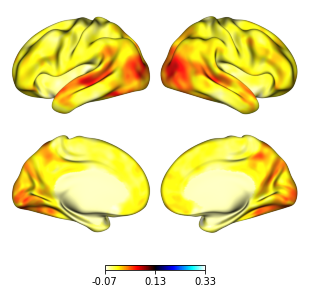

In [26]:
A1=np.load('Data_last/Full_Sub6/A1_sub6_correlations_voxel.npy', allow_pickle=True)
A2=np.load('Data_last/Full_Sub6/A2_correlations_voxel.npy', allow_pickle=True)
A3=np.load('Data_last/Full_Sub6/A3_correlations_voxel.npy', allow_pickle=True)
A4=np.load('Data_last/Full_Sub6/A4_correlations_voxel.npy', allow_pickle=True)
A5=np.load('Data_last/Full_Sub6/A5_correlations_voxel.npy', allow_pickle=True)
A6=np.load('Data_last/Full_Sub6/A6_correlations_voxel.npy', allow_pickle=True)
A7=np.load('Data_last/Full_Sub6/A7_correlations_voxel.npy', allow_pickle=True)
A8=np.load('Data_last/Full_Sub6/A8_correlations_voxel.npy', allow_pickle=True)
A9=np.load('Data_last/Full_Sub6/A9_correlations_voxel.npy', allow_pickle=True)
A10=np.load('Data_last/Full_Sub6/A10_correlations_voxel.npy', allow_pickle=True)
A11=np.load('Data_last/Full_Sub6/A11_correlations_voxel.npy', allow_pickle=True)
A12=np.load('Data_last/Full_Sub6/A12_correlations_voxel.npy', allow_pickle=True)
A13=np.load('Data_last/Full_Sub6/A13_correlations_voxel.npy', allow_pickle=True)
A14=np.load('Data_last/Full_Sub6/A14_correlations_voxel.npy', allow_pickle=True)
A15=np.load('Data_last/Full_Sub6/A15_correlations_voxel.npy', allow_pickle=True)
A16=np.load('Data_last/Full_Sub6/A16_correlations_voxel.npy', allow_pickle=True)
A17=np.load('Data_last/Full_Sub6/A17_correlations_voxel.npy', allow_pickle=True)
A18=np.load('Data_last/Full_Sub6/A18_correlations_voxel.npy', allow_pickle=True)
A19=np.load('Data_last/Full_Sub6/A19_correlations_voxel.npy', allow_pickle=True)
A20=np.load('Data_last/Full_Sub6/A20_correlations_voxel.npy', allow_pickle=True)
A21=np.load('Data_last/Full_Sub6/A21_correlations_voxel.npy', allow_pickle=True)
A_T1=np.concatenate((A1, A2, A3 , A4 , A5, A6, A7, A8 , A9 , A10,A11, A12, A13 , A14 , A15, A16, A17, A18 , A19 , A20 , A21))
print(A_T1.shape)

masker='Data_last/Full_Sub6/sub-06_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

Ridge_correlations = A_T1
    
ff=create_surface_map_from_Full_signal(Ridge_correlations, masker, zoom=None, shape='inflated') 

# Random

(444,)
(1, 444)
(53, 64, 52, 1)


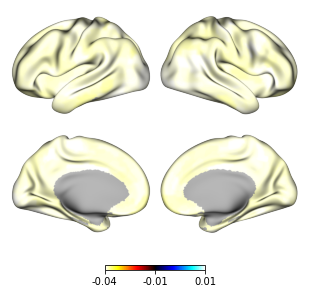

In [29]:
masker='Data_last/MIST_444.nii.gz'

Ridge_correlations = np.load('Data_last/Sub1_Par_Rand/3Sea_Sub1_Par_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)
Ridge_correlations=Ridge_correlations.reshape((1,444))
print(Ridge_correlations.shape)    

ff=create_surface_map_from_parcellated_signal(Ridge_correlations, masker, zoom=None, shape='inflated')

(6728,)
(6728,)
(53, 64, 52)


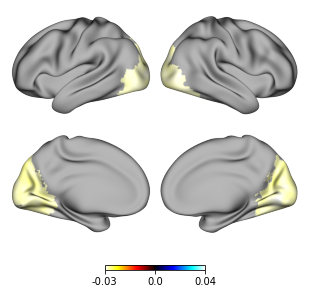

In [30]:
masker='Data_last/template_cambridge_basc_multiscale_sym_scale007.nii.gz'

Ridge_correlations = np.load('Data_last/Sub1_ROI_Rand/3Sea_Sub1_ROI_correlations.npy', allow_pickle=True)
print(Ridge_correlations.shape)
#Ridge_correlations=Ridge_correlations.reshape((1,44))
print(Ridge_correlations.shape)    

ff=create_surface_map_from_ROI_signal(Ridge_correlations, masker, zoom=None, shape='inflated')